In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [2]:
df = pd.read_csv("../new_data_archive/Housing.csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

### Analysis:
- Id needs to be dropped
- date needs to be converted

In [4]:
df = df.drop(['id'], axis=1)
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# covert 'date' to datetime object
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [6]:
# extract year and month as new features
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df = df.drop('date', axis=1)

**Note**: With sale_year and sale_month, you can make analysis like "a house sold in december may be cheaper than on sold in spring."

In [7]:
print(df[['sale_year', 'sale_month']].head())

   sale_year  sale_month
0       2014          10
1       2014          12
2       2015           2
3       2014          12
4       2015           2


In [8]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
sale_year          int32
sale_month         int32
dtype: object

In [9]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sale_year', 'sale_month'],
      dtype='object')

**Summary of Data**

In [10]:
# Shape and basic summary
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423
std,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


**Checking for Null or Duplicate Rows**

In [11]:
null_vals = df.isnull().sum()
duplicated_vals = df.duplicated().sum()

print(f"Number of Null Values: {null_vals}")
print(f"Number of Duplicated Values: {duplicated_vals}")

Number of Null Values: price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sale_year        0
sale_month       0
dtype: int64
Number of Duplicated Values: 2


In [12]:
# Since its only sale_year that have duplicate values, we can keep it
df[df.duplicated()]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,...,350,2008,0,98106,47.5213,-122.357,1070,928,2015,3
20524,529500.0,3,2.25,1410,905,3.0,0,0,3,9,...,0,2014,0,98116,47.5818,-122.402,1510,1352,2015,3


In [13]:
# Check if the sum of above + basement equals living
check_sum = (df['sqft_above'] + df['sqft_basement']) - df['sqft_living']
print(f"Sum of (above + basement) - living: {check_sum.sum()}")
# if result is zero, then it is the same.

Sum of (above + basement) - living: 0


In [14]:
# Drop the sqft_above and sqft_basement since adding them == sqft_living
#  this is to avoid redundant features, handling multicolinearity
df = df.drop(['sqft_above', 'sqft_basement'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


## Target Variable - Price


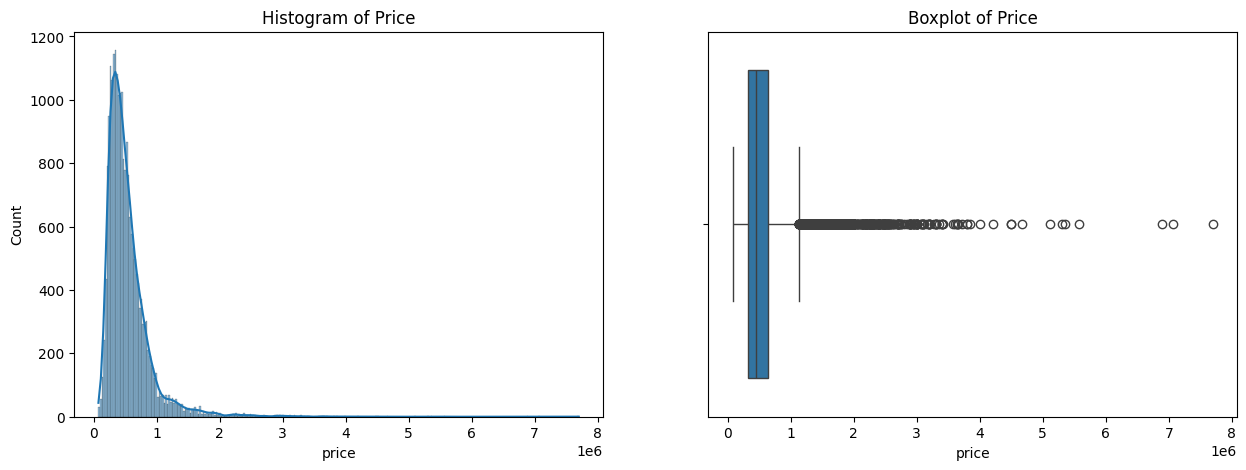

In [15]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# histogram plot
sns.histplot(df['price'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of Price')

# boxplot
sns.boxplot(x=df['price'], ax=axes[1])
axes[1].set_title('Boxplot of Price')
plt.show()

### Analysis of Target and Visuals

Histogram
- Right-skewed distribution.
- Means that most houses in dataset are clustered at the lower-medium price range (refer to the big hump on the left).
- The long tail to the right represents smaller number of very expensive houses.

Boxplot:
- Box is compressed to the left.
- Huge number of outliers on the right (the very expensive houses that makes the data skewed.)


Preprocessing step:
- Use Log Transformation to make the 'price' column evenly distributed.
- This will help ML models work much better, prevents bias to expensive outliers.

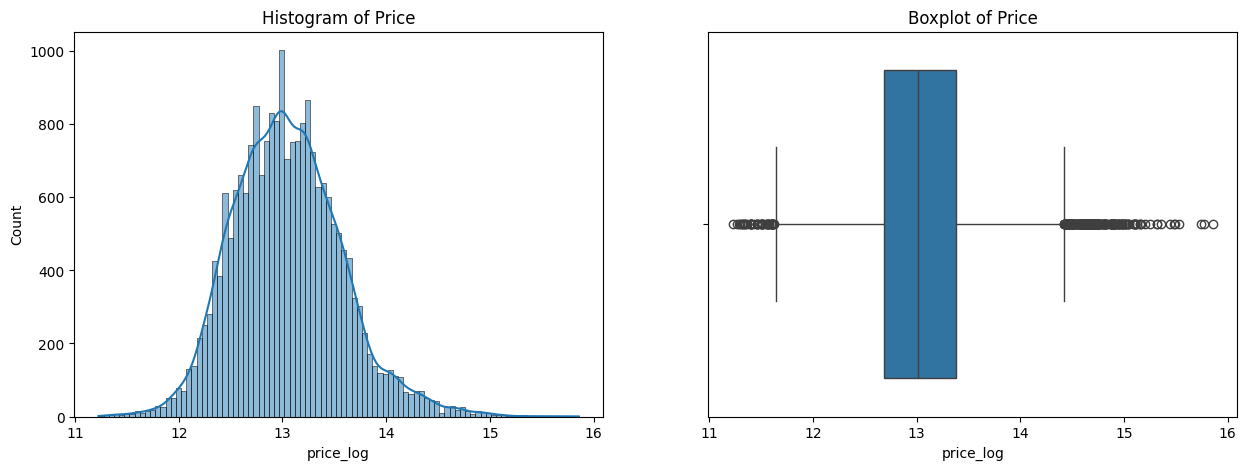

In [16]:
# apply log transformation
df['price_log'] = np.log1p(df['price'])

# now plot it again to see the difference
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# histogram plot
sns.histplot(df['price_log'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of Price')

# boxplot
sns.boxplot(x=df['price_log'], ax=axes[1])
axes[1].set_title('Boxplot of Price')
plt.show()

### Notes:
- This ['price_log'] column is to be used for the model instead of ['price'].
- Note that during the modeling, you will do inverse np.expm1() to change model's predictions into real dollar amount.

## Numerical Features vs. Price

Continuous features: sqft_living, sqft_lot, sqft_living15, sqftlot15

Discrete Features: bedrooms, bathrooms, floors, waterfront

### Continuous Features vs Price Analysis

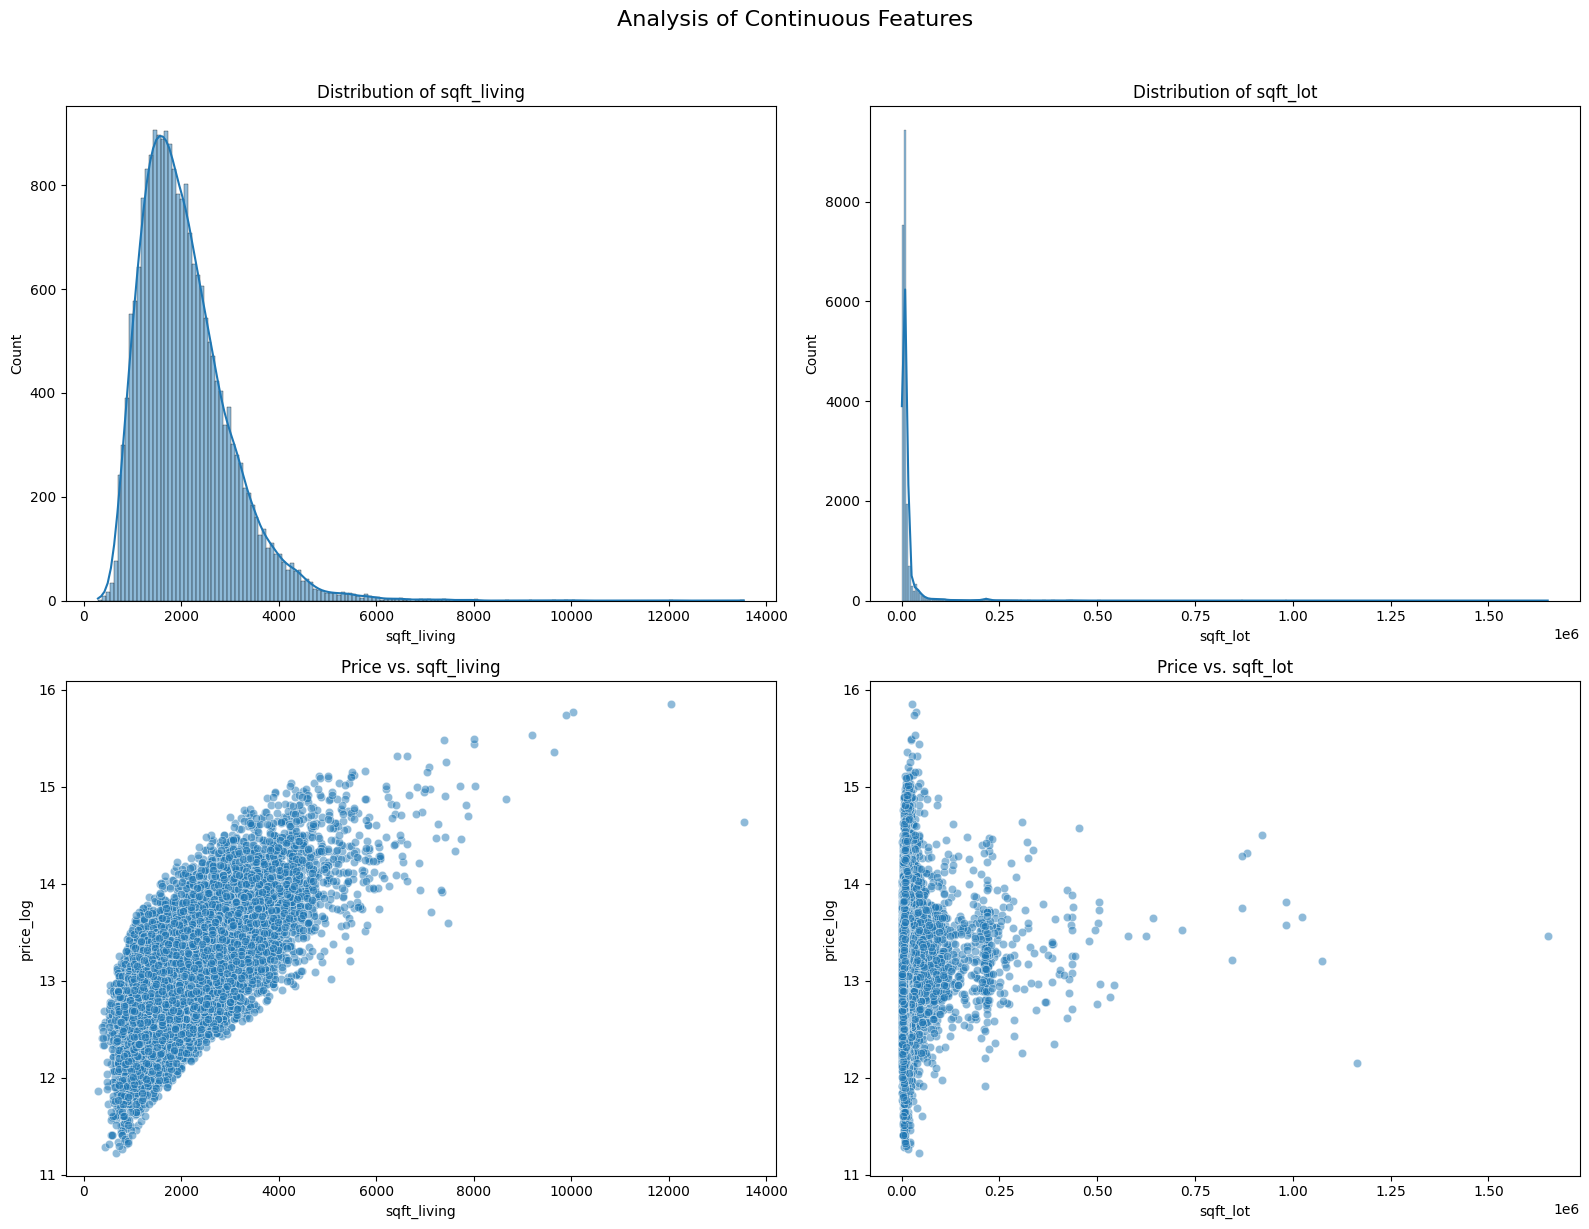

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analysis of Continuous Features', fontsize=16, y=1.02)

# Histogram for sqft_living
sns.histplot(df['sqft_living'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of sqft_living')

# Histogram for sqft_lot
sns.histplot(df['sqft_lot'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of sqft_lot')

# Scatterplot for sqft_living vs. price
sns.scatterplot(x=df['sqft_living'], y=df['price_log'], ax=axes[1, 0], alpha=0.5)
axes[1, 0].set_title('Price vs. sqft_living')

# Scatterplot for sqft_lot vs. price
sns.scatterplot(x=df['sqft_lot'], y=df['price_log'], ax=axes[1, 1], alpha=0.5)
axes[1, 1].set_title('Price vs. sqft_lot')

plt.tight_layout()
plt.show()


### Analysis:

**sqft_living** - interior, habitable space of a home.
- Right-skewed distribution, means most houses have a typical living area, with few very large ones.
- Strong, positive linear relationship shown in scatterplot. As sqft_living goes up, price goes up.

**sqft_lot** - total area of the land the property sits on, including all outdoor space, but does not include the interior of the house itself.
- Extremely right skewed.
- Scatterplot has a weaker positive trend.

Beacuse they are heavily skewed, applying log transform to both will help linear models perform better.


### Discrete Features vs Price Analysis

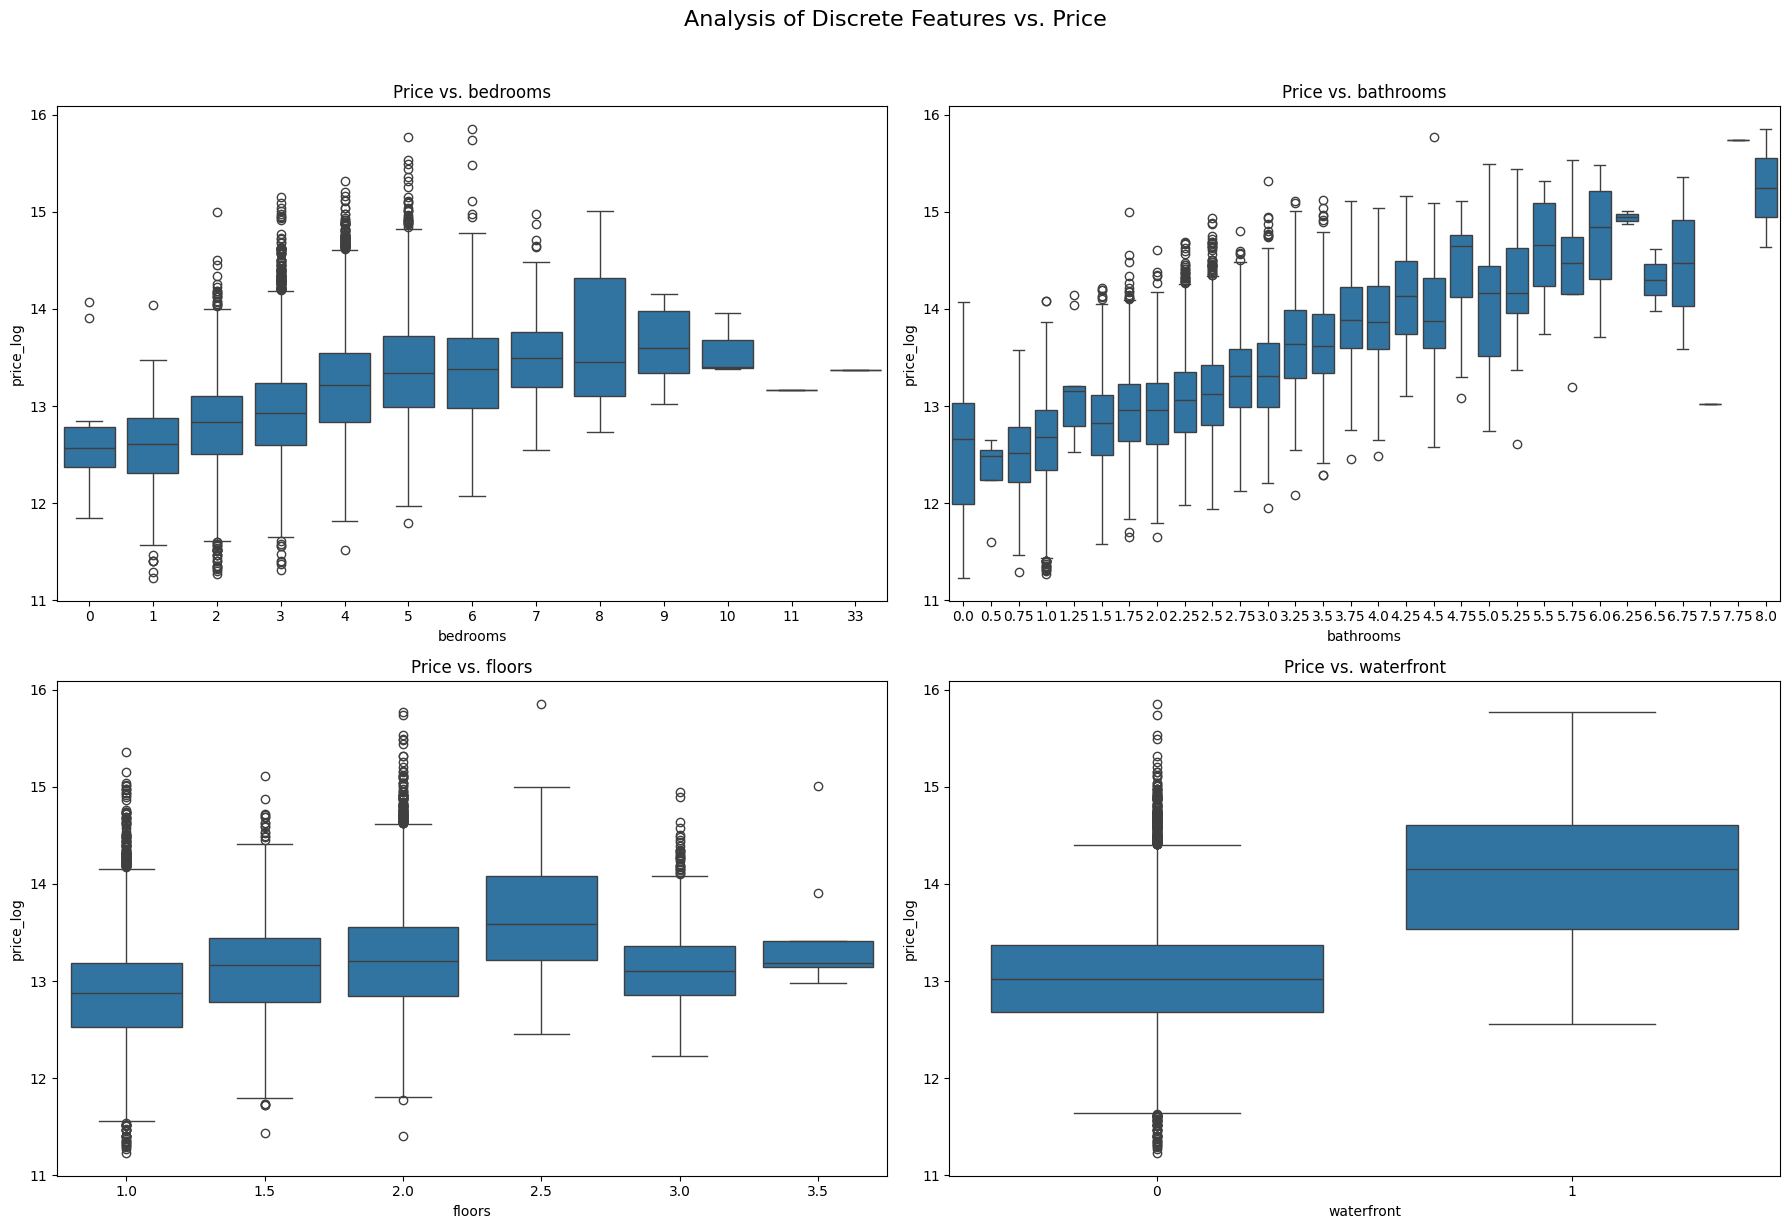

In [18]:
# List of discrete features
discrete_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront']

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Analysis of Discrete Features vs. Price', fontsize=16, y=1.02)
axes = axes.flatten() 

for i, col in enumerate(discrete_cols):
    sns.boxplot(x=col, y='price_log', data=df, ax=axes[i])
    axes[i].set_title(f'Price vs. {col}')

plt.tight_layout()
plt.show()

### Categorical/Ordinal Features vs Price Analysis

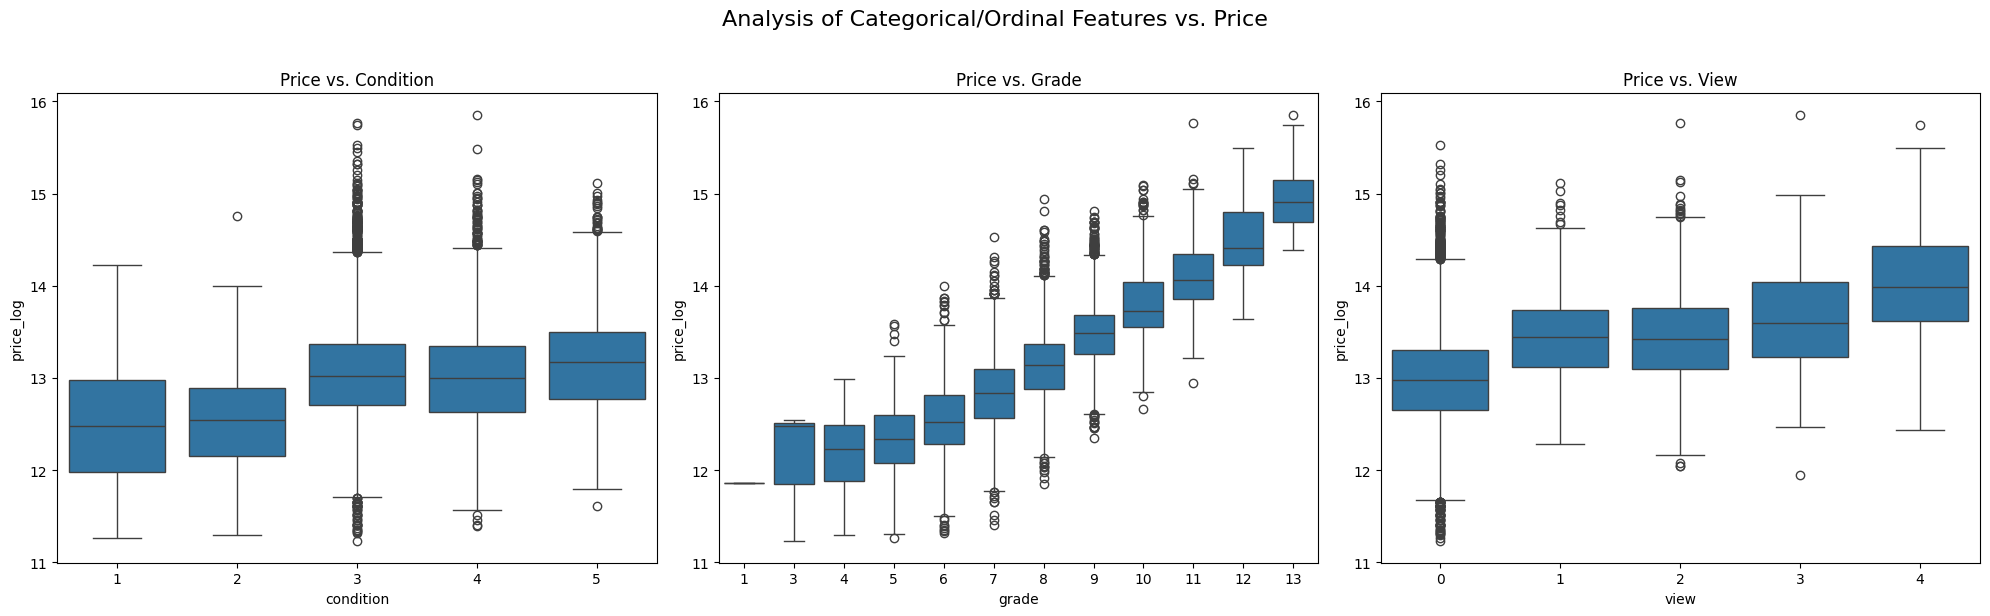

In [19]:
# List of key categorical/ordinal features
cat_ord_cols = ['condition', 'grade', 'view']

# Create a 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Analysis of Categorical/Ordinal Features vs. Price', fontsize=16, y=1.02)

# Plot for 'condition'
# We sort the x-axis to make it easier to read
sns.boxplot(x='condition', y='price_log', data=df, ax=axes[0], order=sorted(df['condition'].unique()))
axes[0].set_title('Price vs. Condition')

# Plot for 'grade'
sns.boxplot(x='grade', y='price_log', data=df, ax=axes[1], order=sorted(df['grade'].unique()))
axes[1].set_title('Price vs. Grade')

# Plot for 'view'
sns.boxplot(x='view', y='price_log', data=df, ax=axes[2], order=sorted(df['view'].unique()))
axes[2].set_title('Price vs. View')

plt.tight_layout()
plt.show()

### Analysis

- most show positive correlation with price_log.
- bedroom is a bit messy and needs fixing

## Feature Engineering

For yr_built and yr_renovated.
A house built in 1950 is different from house built in 1950 but renovated in 2015.

Hence, we create effective_age column for the age of the house from its last update.
We plot this feature against price.

In [20]:
df['yr_renovated'].head()

0       0
1    1991
2       0
3       0
4       0
Name: yr_renovated, dtype: int64

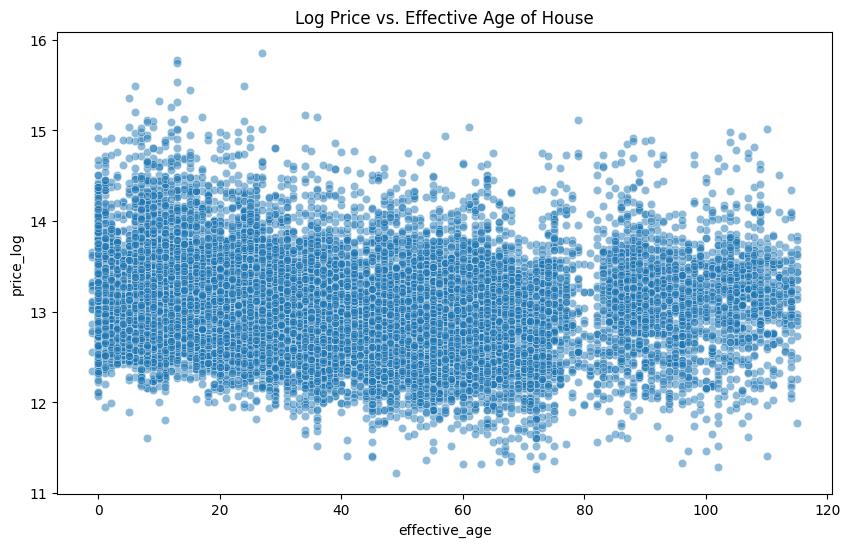

In [21]:
# 1 if yr_renovated is not 0, else 0
df['was_renovated'] = (df['yr_renovated'] > 0).astype(int)

# get effective_year
# use renovation year if exists, else use built year
df['effective_year'] = df.apply(lambda row: row['yr_renovated'] if row['yr_renovated'] > 0 else row['yr_built'], axis=1)

# create effective age from the sale_year
df['effective_age'] = df['sale_year'] - df['effective_year']

# 4. Plot it
plt.figure(figsize=(10, 6))
sns.scatterplot(x='effective_age', y='price_log', data=df, alpha=0.5)
plt.title('Log Price vs. Effective Age of House')
plt.show()

In [22]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sale_year',
       'sale_month', 'price_log', 'was_renovated', 'effective_year',
       'effective_age'],
      dtype='object')

In [23]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

### Correlation Heatmap

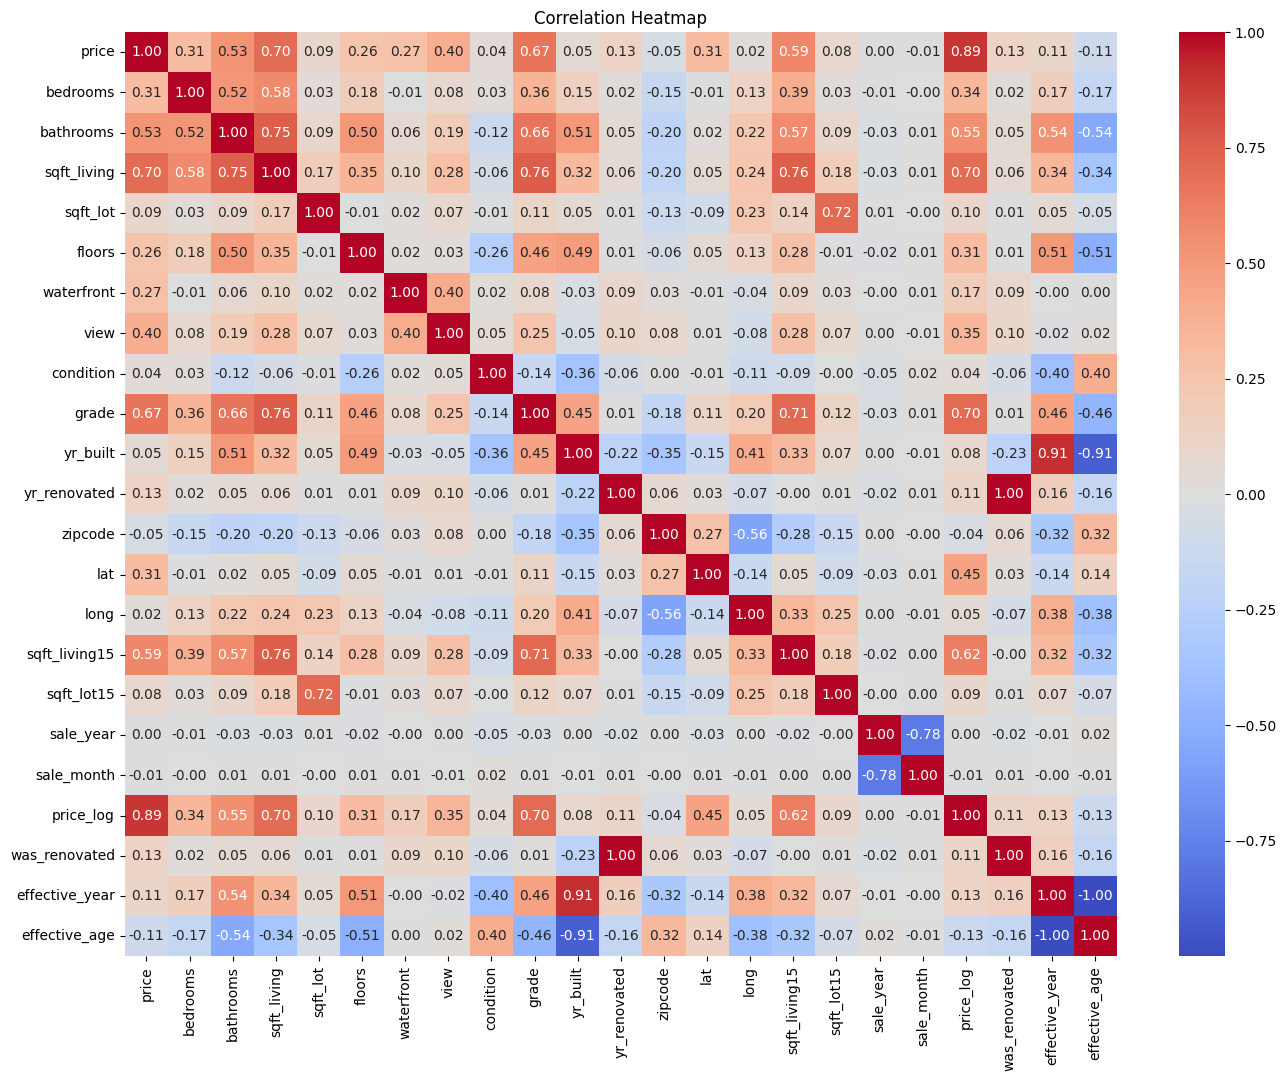

In [24]:
#use log-transformed price for a clearer correlation
df['price_log'] = np.log1p(df['price'])

# Select all numerical columns, including our new date features
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(16, 12))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Analysis

***Best predictors**

**Multicolinearity**

]

# 🧹 Data Preprocessing To-Do List

Here are the required preprocessing steps for our model, based on our EDA findings.

### 1. Initial Data Cleaning

First, we need to clean up the dataset by removing duplicates and clear outliers.

1.  **Drop Duplicates:** Remove the 2 duplicated rows.
    ```python
    df = df.drop_duplicates()
    ```
2.  **Handle 'bedrooms' Outlier:** Remove the row(s) with clear data entry errors.
    ```python
    df = df[df['bedrooms'] < 30]
    ```

### 2. Feature Engineering

Next, we'll create new, more powerful features from the existing columns.

1.  **Handle `date` Column:**
    * Convert `date` to a `datetime` object.
    * Extract `sale_year` and `sale_month`.
    ```python
    df['date'] = pd.to_datetime(df['date'])
    df['sale_year'] = df['date'].dt.year
    df['sale_month'] = df['date'].dt.month
    ```
2.  **Handle `yr_built` and `yr_renovated`:**
    * Create a binary `was_renovated` feature.
    * Create an `effective_year` feature (uses `yr_renovated` if it exists, else `yr_built`).
    * Create `effective_age` (age of the house at the time of sale).
    ```python
    df['was_renovated'] = (df['yr_renovated'] > 0).astype(int)
    df['effective_year'] = df.apply(lambda row: row['yr_renovated'] if row['yr_renovated'] > 0 else row['yr_built'], axis=1)
    df['effective_age'] = df['sale_year'] - df['effective_year']
    ```

### 3. Transforming Skewed Features

We need to apply a log transform to our right-skewed target and predictor variables to normalize them.

1.  **Target Variable (`price`):**
    ```python
    df['price_log'] = np.log1p(df['price'])
    ```
2.  **Skewed Predictors:**
    ```python
    df['sqft_living_log'] = np.log1p(df['sqft_living'])
    df['sqft_lot_log'] = np.log1p(df['sqft_lot'])
    df['sqft_living15_log'] = np.log1p(df['sqft_living15'])
    df['sqft_lot15_log'] = np.log1p(df['sqft_lot15'])
    ```

### 4. Dropping Unnecessary Columns

Now we drop all the original, redundant, or replaced columns.

```python
# We're keeping 'price_log'
cols_to_drop = [
    'price',            # Replaced by 'price_log'
    'date',             # Replaced by 'sale_year', 'sale_month'
    'sqft_above',       # Redundant with 'sqft_living'
    'sqft_basement',    # Redundant with 'sqft_living'
    'yr_built',         # Replaced by 'effective_age'
    'yr_renovated',     # Replaced by 'effective_age', 'was_renovated'
    'lat',              # We are using zipcode instead
    'long',             # We are using zipcode instead
    'sqft_living',      # Replaced by 'sqft_living_log'
    'sqft_lot',         # Replaced by 'sqft_lot_log'
    'sqft_living15',    # Replaced by 'sqft_living15_log'
    'sqft_lot15'        # Replaced by 'sqft_lot15_log'
]

df_processed = df.drop(columns=cols_to_drop)

### 5. One-Hot-Encoding for Categorical Features.

Please see the number of unique values of the categorical columns and determine if one-hot-encoding is possible.

### Final Steps (IMPORTANT)
This must be done after creating the processed DataFrame.

Define X (features) and y (target):

- y is df_processed['price_log']

- X is everything else in df_processed.

Train-Test Split:

- Split X and y into training and testing sets.
        Python
        `from sklearn.model_selection import train_test_split

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        `

Scale Numerical Features:

- Fit a StandardScaler only on X_train.

- Transform both X_train and X_test with the fitted scaler.

- Note: Don't scale binary features like waterfront or was_renovated.